In [26]:
print('2022605')
import pandas as pd
import numpy as np
df = pd.read_csv('/content/teleCust1000t.csv')
df.head()

2022605


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [4]:
df.drop_duplicates(inplace=True)

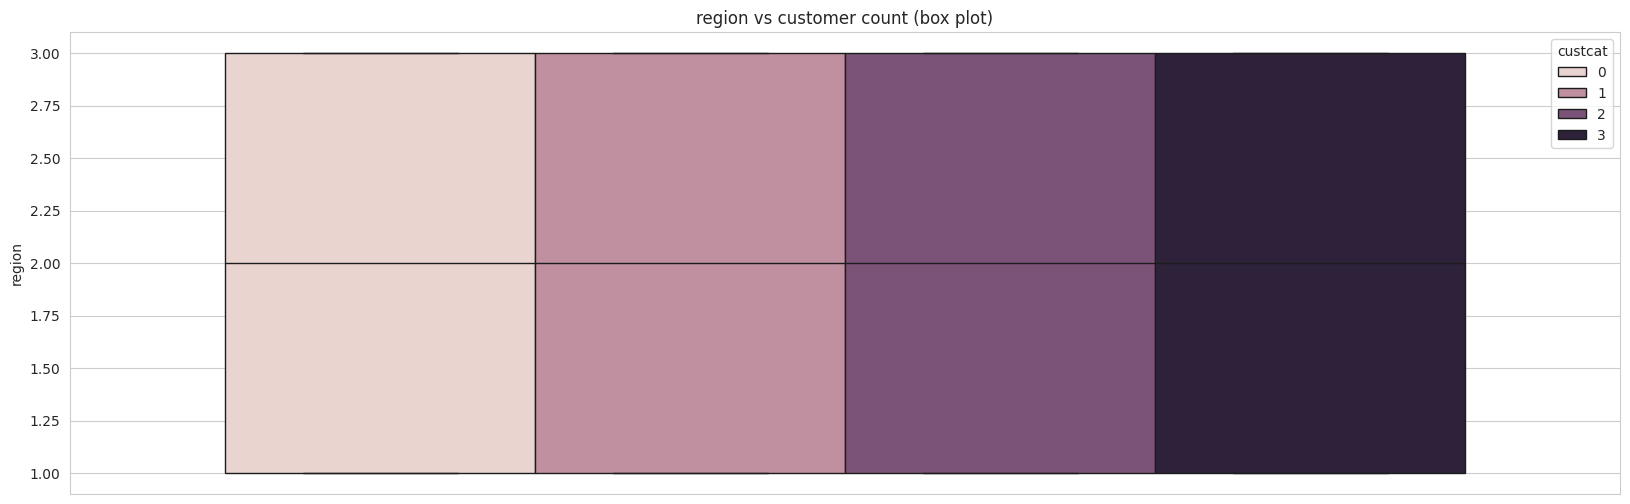

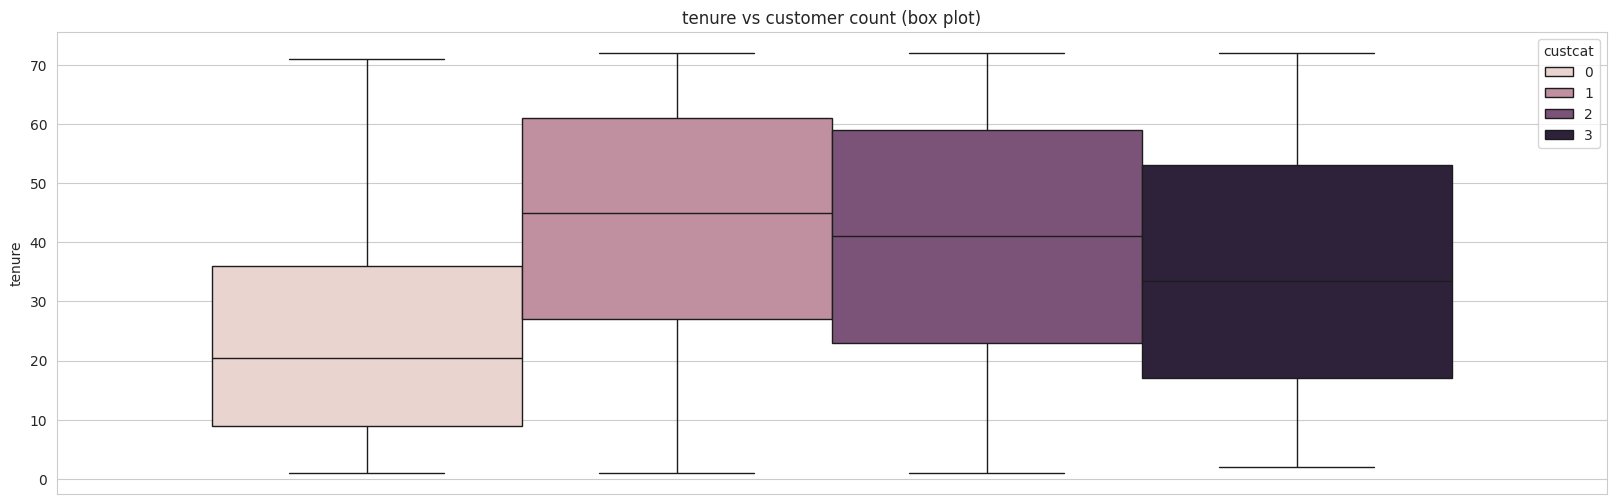

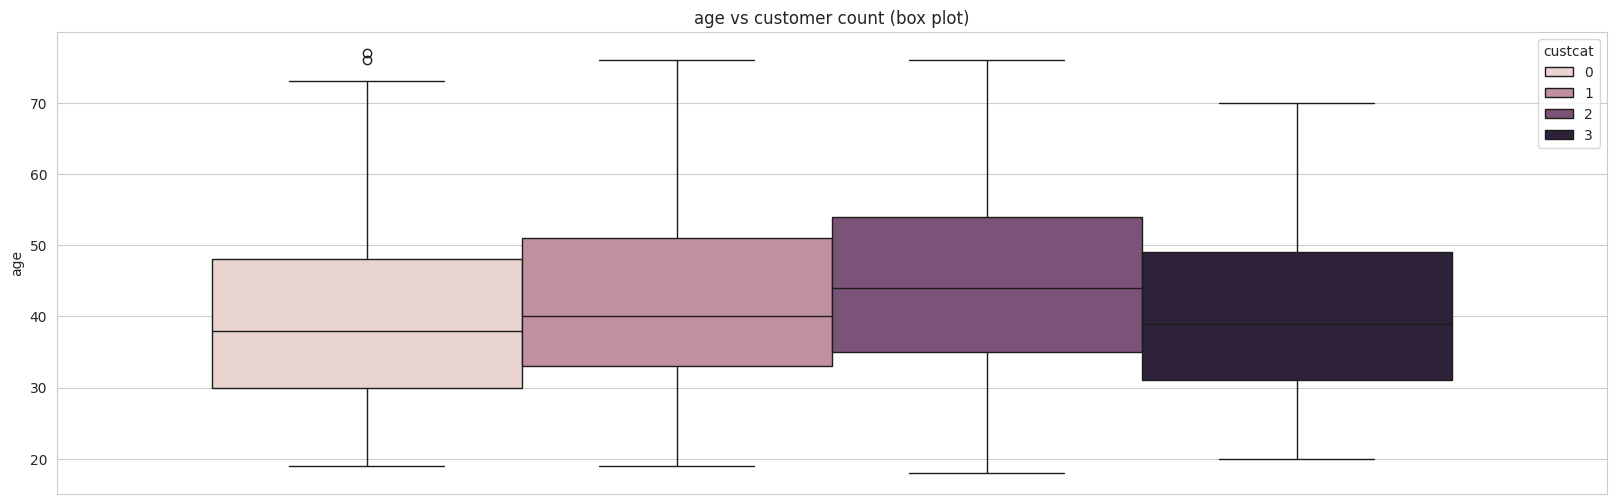

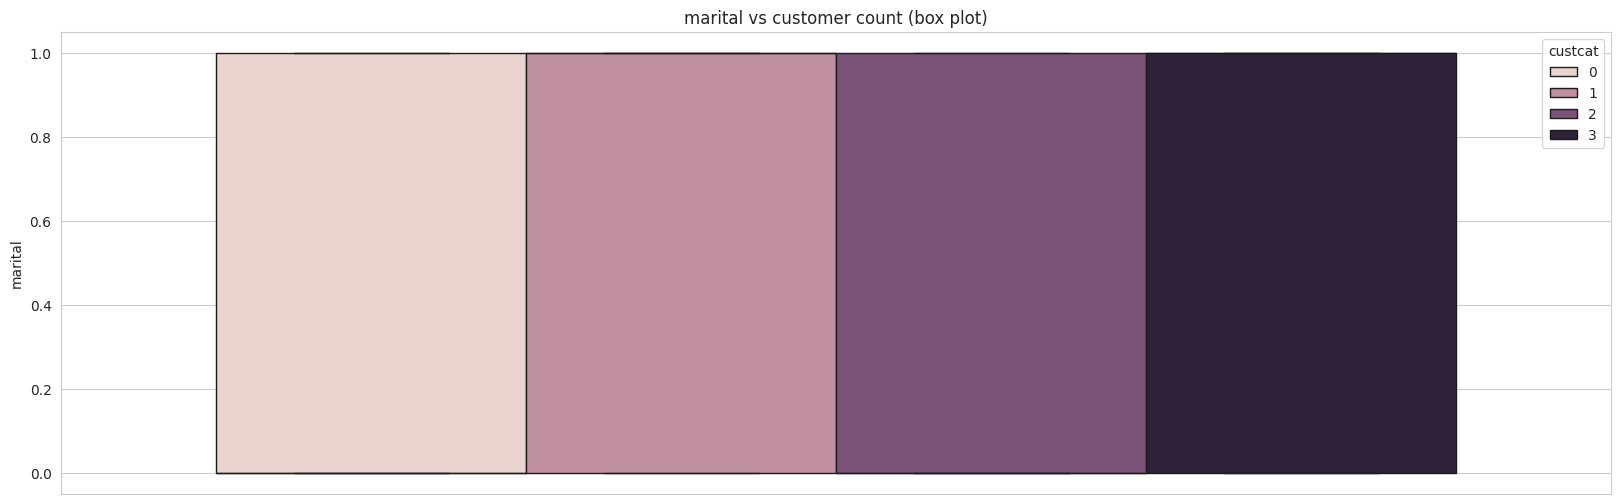

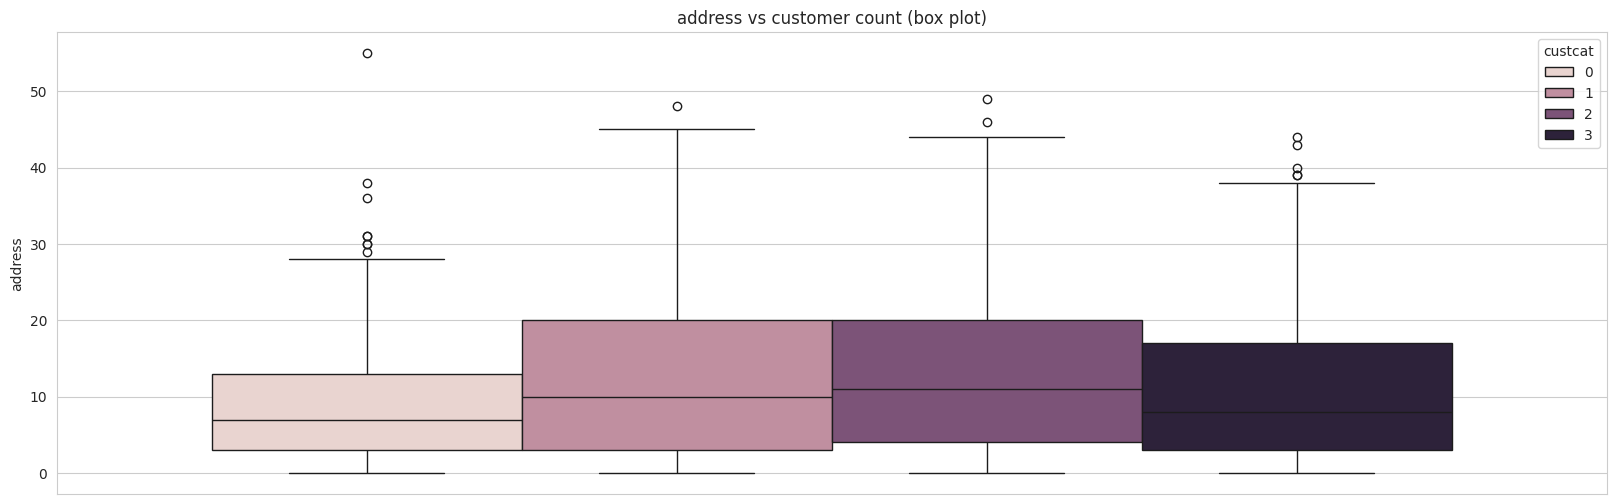

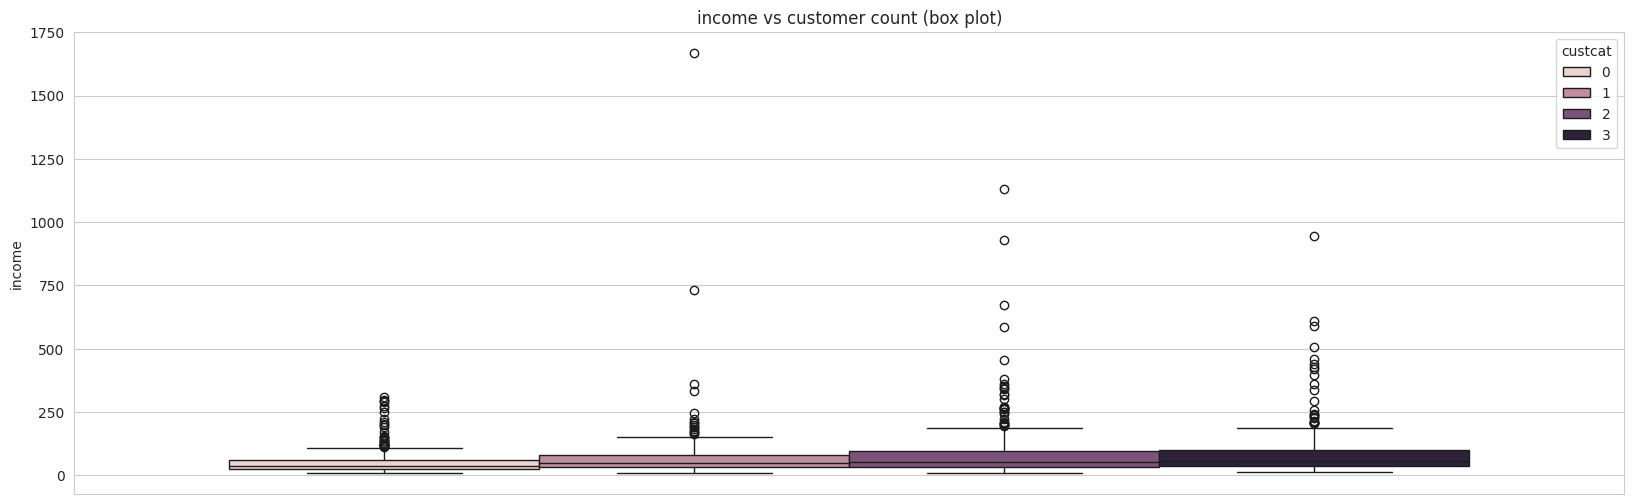

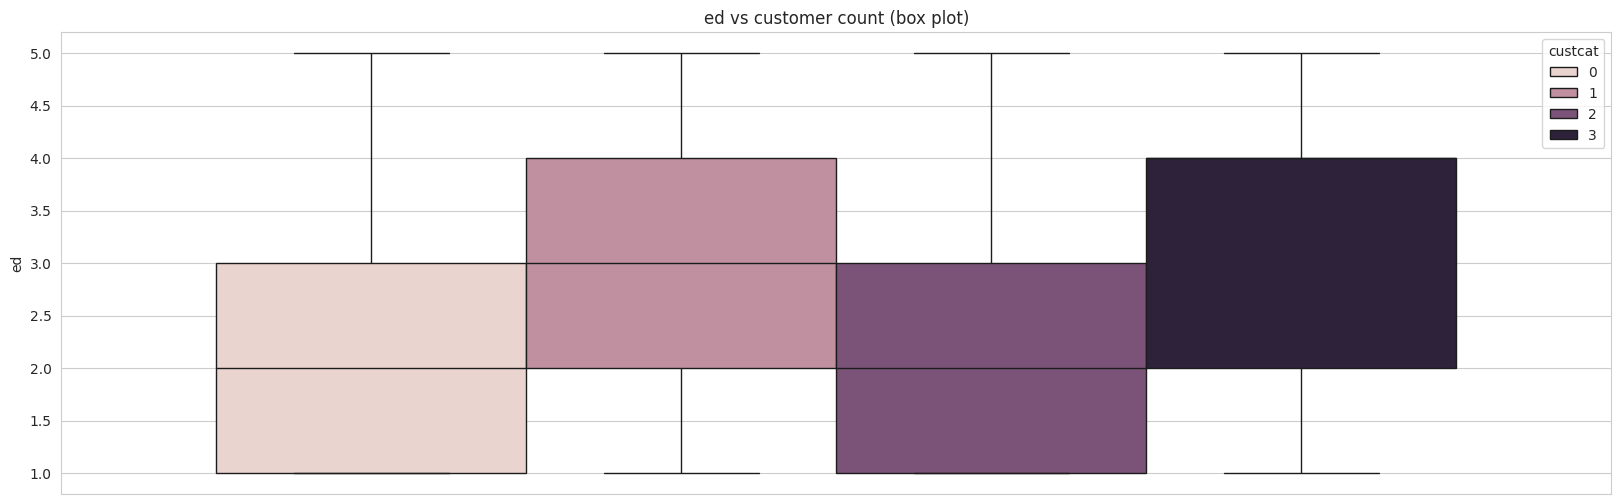

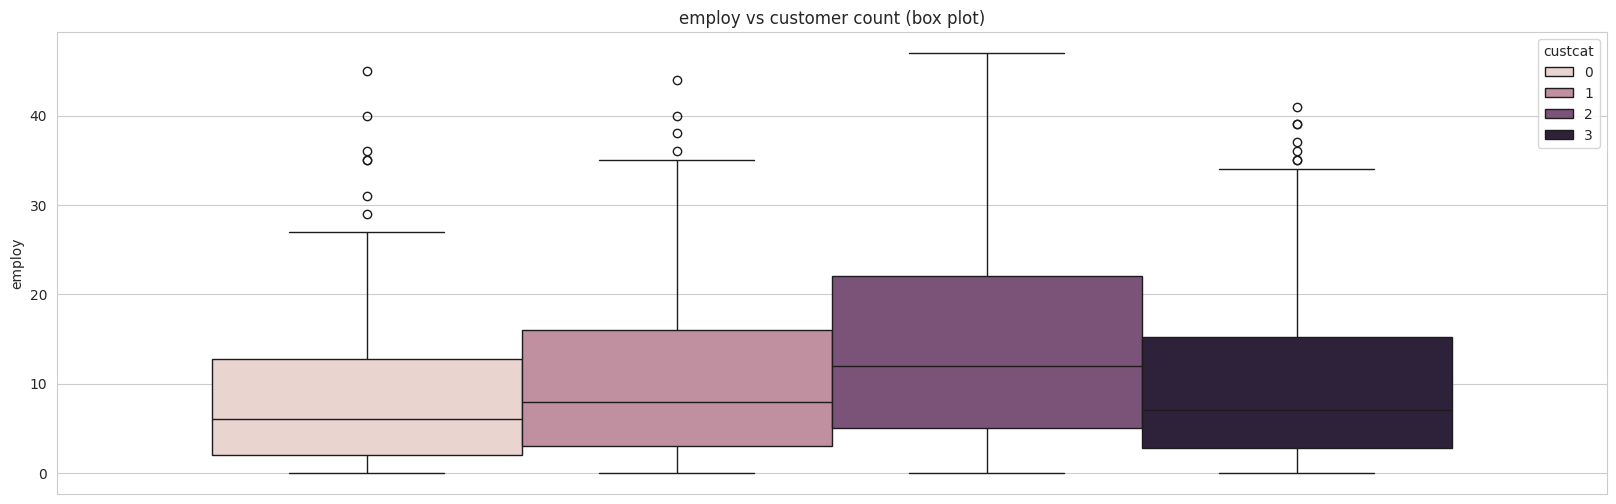

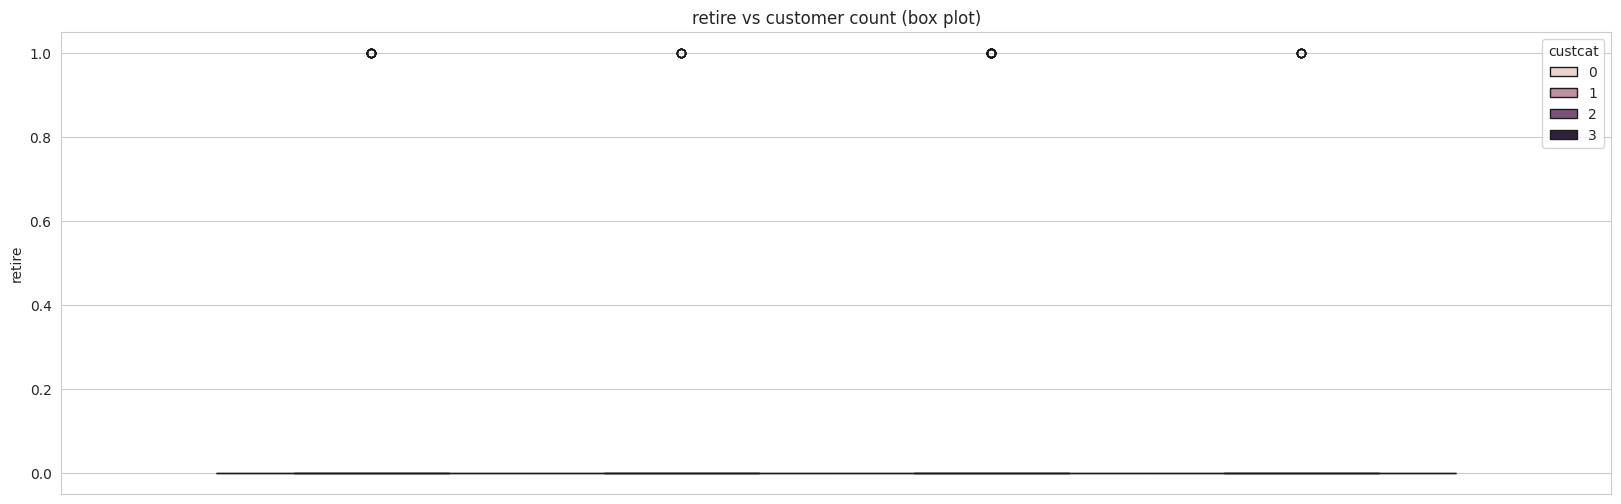

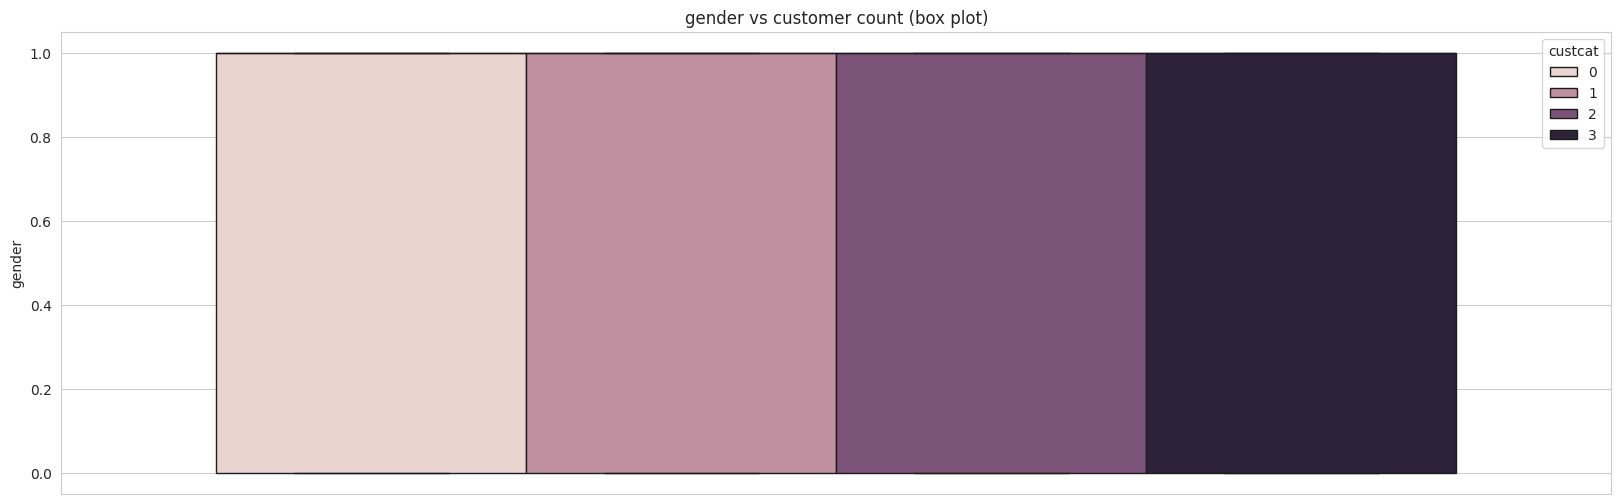

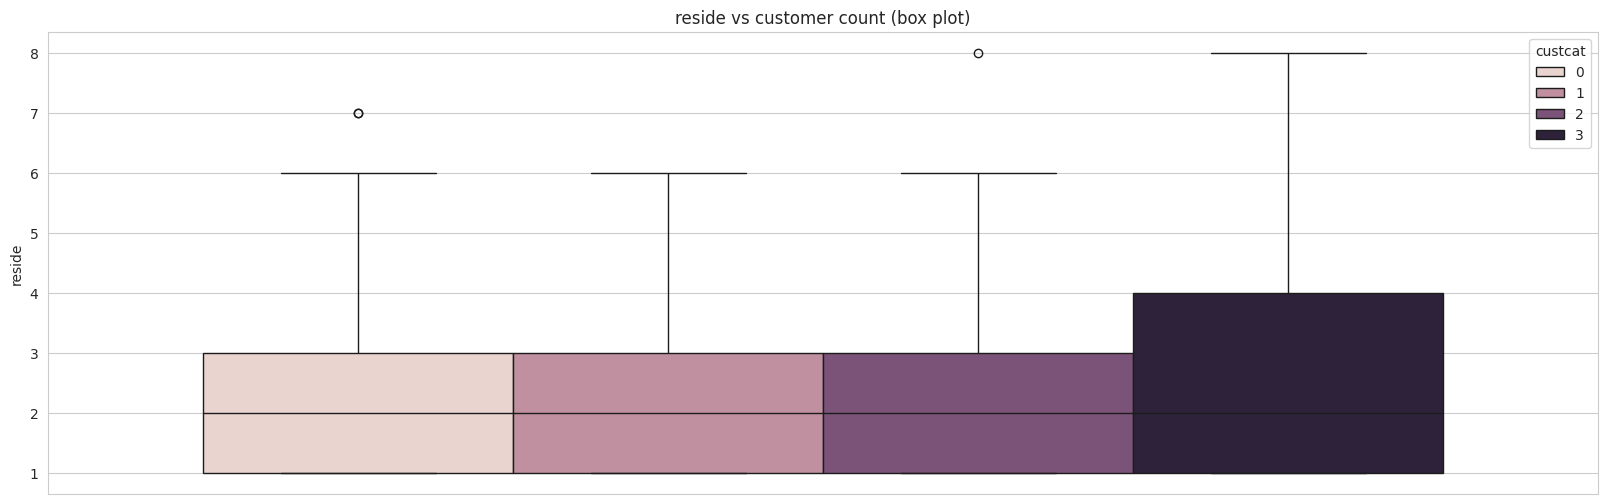

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# feature set
features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']

for feature in features:
  plt.figure(figsize=(20, 6))
  sns.boxplot(hue='custcat', y=feature, data=df)
  plt.title(f"{feature} vs customer count (box plot)")
  plt.show()

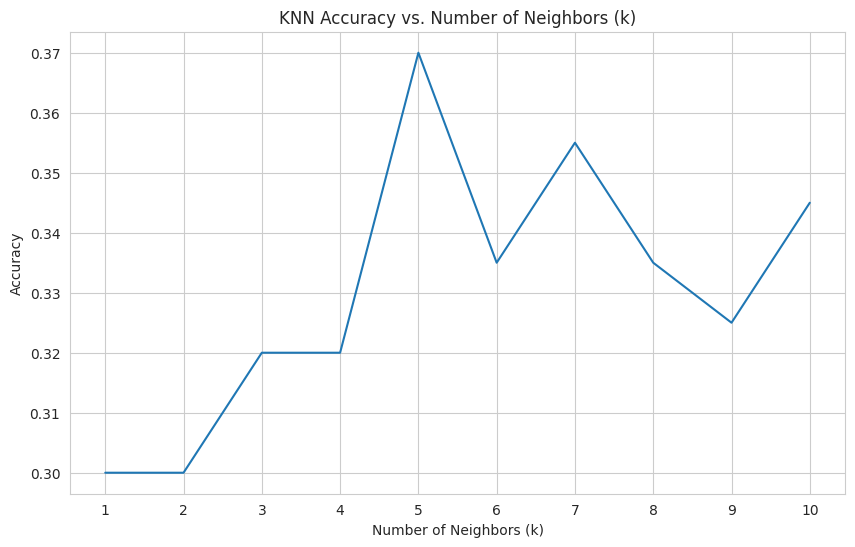

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter

# differentiating features (X) and target variable (y)
X = df.drop(columns=['custcat'])
y = df['custcat']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
# Standardize features by making the mean = 0 and standard deviation = 1 so that all features
# have same scale. This will eliminate biasness in model by making influence of each feature equal.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# class for KNN model
class KNN:

# Initialize the KNN object with the value of k
  def __init__(self, k):
    self.k = k

# Store the training data and labels
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

# Predict the labels for the test data
  def predict(self, X_test):
    predictions = []
# Iterate over each test instance
    for x in X_test:
# Get the k nearest neighbors for the current test instance
      neighbors = self.get_neighbors(x)
# Get the k nearest neighbors for the current test instance
      most_common_label = Counter(neighbors).most_common(1)[0][0]
# Add the predicted label to the list of predictions
      predictions.append(most_common_label)
    return predictions

  def get_neighbors(self, x):
# Calculate the distances between the current test instance and all training instances
    distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
# Sort the indices of training instances based on their distances
    sorted_indices = np.argsort(distances)[:self.k]
# Get the labels of the k nearest neighbors
    neighbors = [self.y_train[i] for i in sorted_indices]
    return neighbors

# list for storing accuracies
accuracies = []

for k in range(1, 11):
# Create KNN classifier
  model = KNN(k)

# Train the classifier
  model.fit(X_train, y_train)

# Predict on test data
  prediction = model.predict(X_test)

# Calculate accuracy
  accuracy = accuracy_score(y_test, prediction)
  accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies)
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))  # Helps in making the x-axis labels more readable
plt.show()
